In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
age_model = cv2.dnn.readNetFromCaffe('../data/age_gender/age_net_deploy.prototxt',
                                     '../data/age_gender/age_net.caffemodel')
gender_model = cv2.dnn.readNetFromCaffe('../data/age_gender/gender_net_deploy.prototxt',
                                        '../data/age_gender/gender_net.caffemodel')

In [33]:
mean_blob = np.load('../data/age_gender/mean.npy')
print(mean_blob.shape, mean_blob.dtype)

(1, 3, 256, 256) float64


In [34]:
orig_frame = cv2.imread('../data/face.jpeg')
dx = (orig_frame.shape[1]-orig_frame.shape[0]) // 2
orig_frame = orig_frame[:,dx:dx+orig_frame.shape[0]]

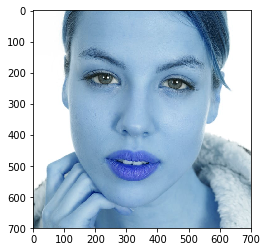

In [35]:
plt.imshow(orig_frame)

In [36]:
frame = cv2.resize(orig_frame, (256,256)).astype(np.float32)
# frame -= np.transpose(mean_blob[0], (1,2,0)) 왜 빼주는줄 모르겟음( 넣으면 결과가 달라짐)

In [37]:
AGE_LIST = ['(0, 2)','(4, 6)','(8, 12)','(15, 20)',
            '(25, 32)','(38, 43)','(48, 53)','(60, 100)']
GENDER_LIST = ['male','female']

In [38]:
blob = cv2.dnn.blobFromImage(frame, 1, (256,256))
gender_model.setInput(blob)
gender_prob = gender_model.forward()
gender_id = np.argmax(gender_prob)
print('Gender: {} with prob: {}'.format(GENDER_LIST[gender_id], gender_prob[0, gender_id]))

Gender: female with prob: 0.9996920824050903


In [39]:
age_model.setInput(blob)
age_prob = age_model.forward()
age_id = np.argmax(age_prob)
print('Age group: {} with prob: {}'.format(AGE_LIST[age_id], age_prob[0, age_id]))

Age group: (25, 32) with prob: 0.8281335830688477


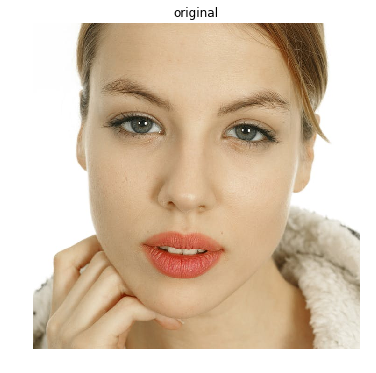

In [40]:
plt.figure(figsize=(6,6))
plt.title('original')
plt.axis('off')
plt.imshow(orig_frame[:,:,[2,1,0]])
plt.show()